<a href="https://colab.research.google.com/github/he4tnix/multimedia_tasks/blob/main/Actividad_2/Actividad_2_ContrerasPatricio_207676861.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 2</h2></center>
<center><h3>Fundamentos: Análisis espectral</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Patricio Contreras</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Carga archivos y carga datos en python
<p align="justify">
Una de las tareas más importantes es la de cargar archivos que incluyan datos para el procesamiento.

<p align="justify">
Debes cargar los dos archivos en formato txt y CSV, adquirir los datos y presentarlos en graficos usando la librería Matplotlib
    
    

fatal: destination path 'EIE_401_MULTIMEDIA' already exists and is not an empty directory.


Text(0, 0.5, 'Absorbance TE []')

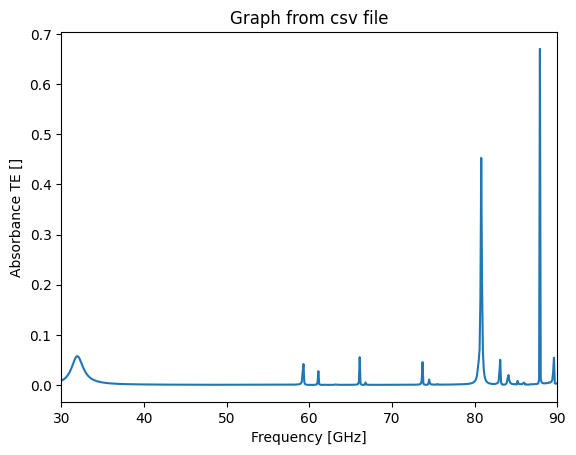

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

!git clone 'https://github.com/Jorgecardenas1/EIE_401_MULTIMEDIA.git'
archivo= pd.read_csv('/content/EIE_401_MULTIMEDIA/Actividades/Actividad 2/AbsorbanceTE_0-0.csv')

plt.plot(archivo['Freq [GHz]'],archivo['AbsorbanceTE []'])
plt.xlim(30, 90)
plt.title('Graph from csv file')
plt.xlabel('Frequency [GHz]')
plt.ylabel('Absorbance TE []')

gzip: /content/EIE_401_MULTIMEDIA/Actividades/Actividad 2/H-H1_GWOSC_16KHZ_R1-1268431079-32.txt.gz: No such file or directory


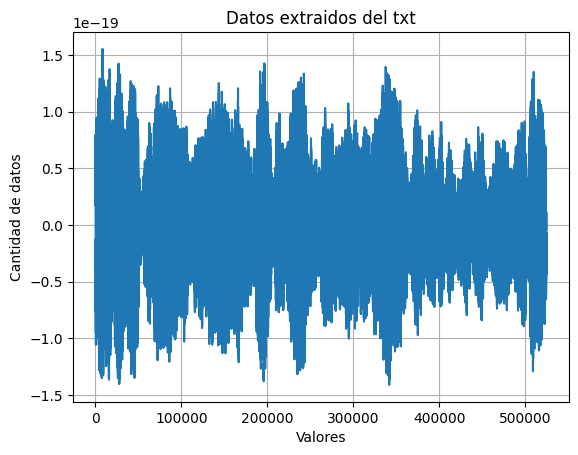

In [ ]:
!gunzip '/content/EIE_401_MULTIMEDIA/Actividades/Actividad 2/H-H1_GWOSC_16KHZ_R1-1268431079-32.txt.gz'

texto = open('/content/EIE_401_MULTIMEDIA/Actividades/Actividad 2/H-H1_GWOSC_16KHZ_R1-1268431079-32.txt')

#Se extrae la linea de texto que no aporta nada
valores = []
for linea in texto:
    if not linea.startswith('#'):
        valores.append(linea)

#Se almacenan los valores numericos

texto = [float(i.strip()) for i in valores]

# Se grafican los datos extraidos
plt.plot(range(len(texto)), texto)
plt.xlabel('Valores')
plt.ylabel('Cantidad de datos')
plt.title('Datos extraidos del txt')
plt.grid(True)

## 2. Señal
<p align="justify">
Crea una señal continua (la suma de dos senoidales/cosenoidales, exponenciales) que utilizaras para las demostraciones siguientes. Presenta la función que usaste en una gráfica de tal forma que la ecuación esté incluida en dicha gráfica.

Incluye la ecuación en una celda de tu notebook usando LATEX.


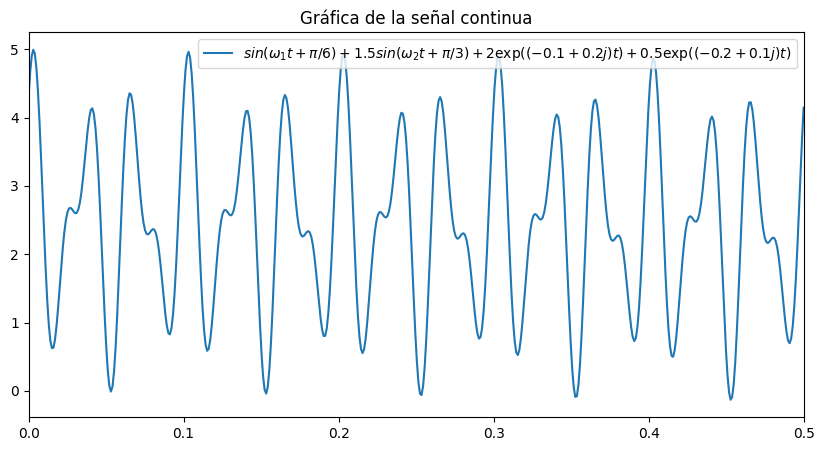

In [12]:
import numpy as np
import matplotlib.pyplot as plt

time = np.linspace(0,0.5,500)
frec1 = 50 #Hz
frec2 = 30 #Hz

señal_1 = np.sin(2*np.pi*frec1*time+np.pi/6)
señal_2 = 1.5*np.sin(2*np.pi*frec2*time+np.pi/3)
señal_3 =  2 * np.exp((-0.1 + 1j*0.2)*time) + 0.5 * np.exp((-0.2 + 1j*0.1)*time)

new_signal = señal_1 + señal_2 + señal_3

plt.figure(figsize=(10,5))
plt.plot(time, new_signal, label='$sin(\omega_1 t + \pi/6) + 1.5sin(\omega_2 t + \pi/3) + 2\exp((-0.1 + 0.2j)t)+0.5\exp((-0.2 + 0.1j)t)$')
plt.xlim(0,0.5)
plt.title('Gráfica de la señal continua')
plt.legend()

#$sin(\omega_1 t + \pi/6) + 1.5cos(\omega_2 t + \pi/3 + 2\exp((-0.1 + 0.2j)t)+0.5\exp((-0.2 + 0.1j)t))$ #Ecuación en celda de mi notebook

$sin(\omega_1 t + \pi/6) + 1.5cos(\omega_2 t + \pi/3) + 2\exp((-0.1 + 0.2j)t)+0.5\exp((-0.2 + 0.1j)t)$

## 3. Sampleo
<p align="justify">
En este punto debes comprobar como se da la operación de sampleo y que sucede ante cambios en el intervalo de sampleo.    


### 3.1 Crea una señal impulso (delta) y desplazala
Para esto puedes usar alguna librería de python

<StemContainer object of 3 artists>

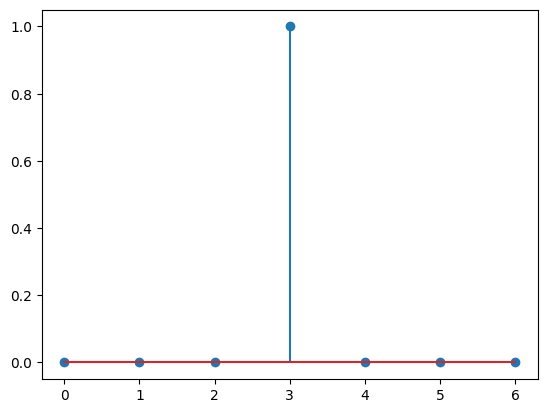

In [ ]:
from scipy import signal
delta = signal.unit_impulse(7,3)
plt.stem(delta)

### 3.2 Genere una señal Senoidal y realice la operación de sampleo
Puedes utilizar el método "stem" de matplotlib para plotear el resultado.

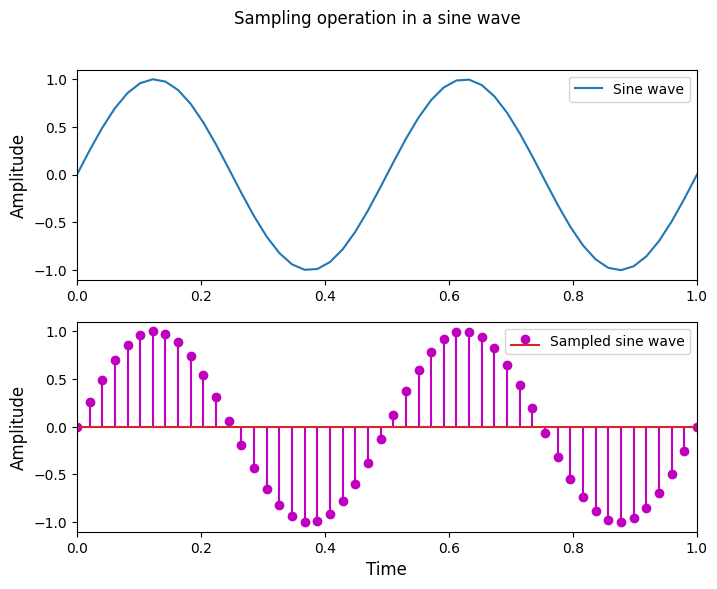

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


frec = 100 #Hz
t = np.linspace(0, 1)
sinwave= np.sin(2*np.pi *frec* t)

fs = 2*frec

T = 1 / fs
n = np.linspace(0, 1/T)
nT = n * T
sinwave_sampled = np.sin(2*np.pi * frec * nT)

plt.figure(figsize=(8,6))
plt.suptitle('Sampling operation in a sine wave')

plt.subplot(2,1,1)
plt.plot(t, sinwave, label='Sine wave')
plt.xlim(0,1)
plt.ylabel('Amplitude', fontsize=12)
plt.legend(fontsize=10, loc='upper right')

plt.subplot(2,1,2)
plt.stem(nT, sinwave_sampled,'m', label='Sampled sine wave')
plt.xlim(0,1)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Amplitude', fontsize=12)
plt.legend(fontsize=10, loc='upper right')



### 3.3 Genere una señal Triangular y realice la operación de sampleo

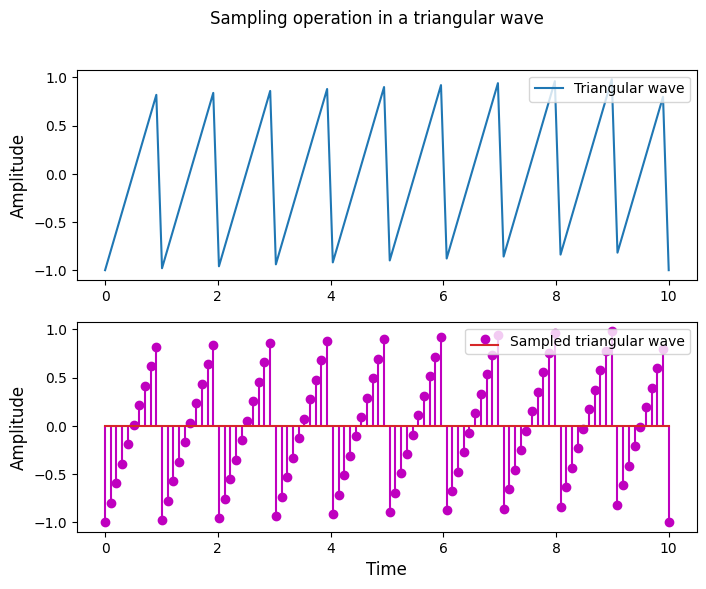

In [ ]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

time = np.linspace(0,10,100)
frec = 100
fs=250 #Se utiliza la frecuencia de muestreo del teorema de Niquist
T=1/fs

triangle_signal = signal.sawtooth(2*np.pi*frec* time)

#Sampling

n = np.linspace(0,10/T, 100)
nT = n * T


triangle_sampled = signal.sawtooth(2*np.pi*frec*nT)


plt.figure(figsize=(8,6))
plt.suptitle('Sampling operation in a triangular wave')

plt.subplot(2,1,1)
plt.plot(time,triangle_signal, label='Triangular wave')
plt.ylabel('Amplitude', fontsize=12)
plt.legend(fontsize=10, loc='upper right')

plt.subplot(2,1,2)
plt.stem(nT,triangle_sampled,'m', label='Sampled triangular wave')
plt.xlabel('Time', fontsize=12)
plt.ylabel('Amplitude', fontsize=12)
plt.legend(fontsize=10, loc='upper right')


### 3.4 Realice la operación de sampleo sobre la señal que generaste en el punto 2

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:3387: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<StemContainer object of 3 artists>

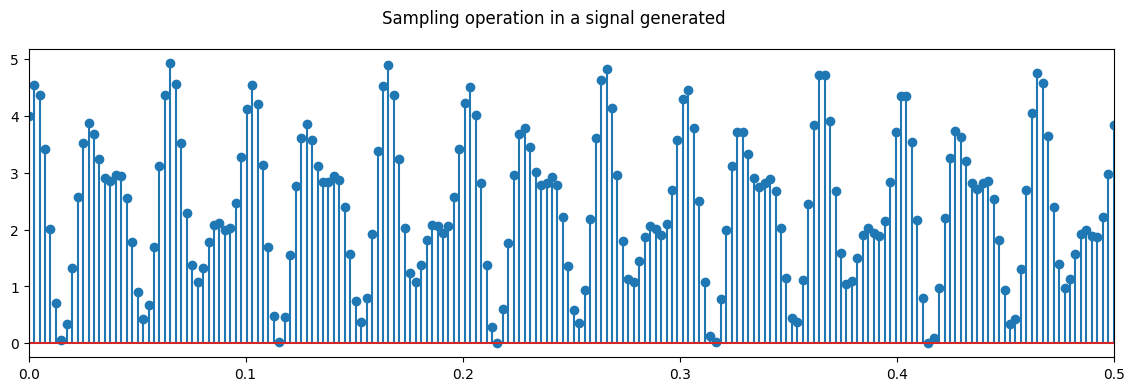

In [15]:
#Teorema del muestreo

frec1=50
frec2=30
fs=100 #Se utiliza la frecuencia mayor para el teorema de Nyquist
T=1/fs

n = np.linspace(0,0.5/T,200)
nT = n * T

ss = np.sin(2*np.pi*frec1*nT) +1.5*np.cos(2*np.pi*frec2*nT) + 2 * np.exp((-0.1 + 1j*0.2)*nT) + 0.5 * np.exp((-0.2 + 1j*0.1)*nT)

plt.figure(figsize=(14,4))
plt.suptitle('Sampling operation in a signal generated')
plt.xlim(0,0.5)
plt.stem(nT, ss)

### 3.5 Compruebe el teorema de Nyquist
Para comprobarlo, debes evaluar algunos casos:
1. la frecuencia de sampleo _f_ es mayor que la frecuencia máxima de tu señal, Fmax.
2. la frecuencia de sampleo _f_ es mayor que 2*Fmax.
3. la frecuencia de sampleo _f_ es mayor que 5*Fmax.

<p align="justify">
Debe graficar:

1. la señal original.
2. la señal sampleada.
3. la señal reconstruida a partir del sampleo.

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:3387: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


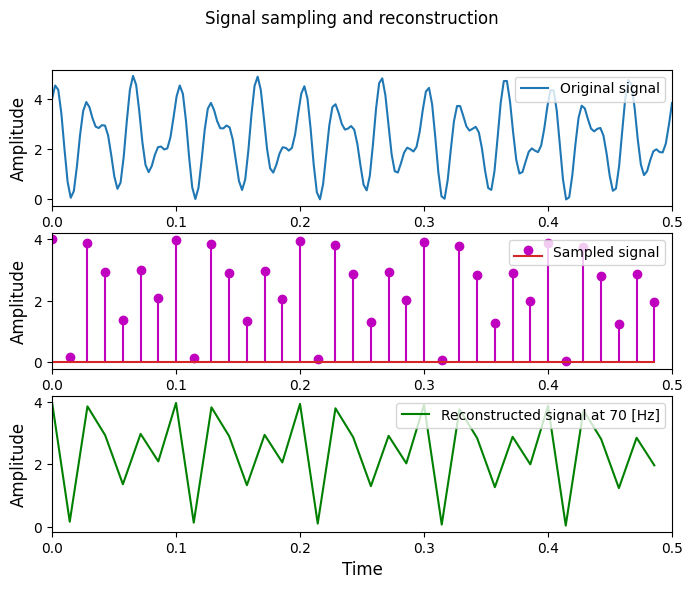

In [29]:
#Cuando la frecuencia de sampleo fs es mayor a la frecuencia máxima

f_1 = 50 #Frecuencia mayor es de 50 [Hz]
f_2 = 30
time = np.linspace(0,0.5,200)

#Señal original
Signal = np.sin(2*np.pi*f_1*time)+1.5*np.cos(2*np.pi*f_2*time) + 2 * np.exp((-0.1 + 1j*0.2)*time) + 0.5 * np.exp((-0.2 + 1j*0.1)*time)

#Sampleo de señal
fs = 70
T = 1/fs

n = np.arange(0, 0.5/T)
nT = n * T

#Señal sampleada y reconstuida

Signal_sampled = np.sin(2*np.pi*f_1*nT)+1.5*np.cos(2*np.pi*f_2*nT) + 2 * np.exp((-0.1 + 1j*0.2)*nT) + 0.5 * np.exp((-0.2 + 1j*0.1)*nT)

#Graficando señal original, sampleada y reconstruida

plt.figure(figsize=(8,6))
plt.suptitle('Signal sampling and reconstruction')

plt.subplot(3,1,1)
plt.plot(time,Signal, label='Original signal')
plt.xlim(0,0.5)
plt.ylabel('Amplitude', fontsize=12)
plt.legend(fontsize=10, loc='upper right')

plt.subplot(3,1,2)
plt.stem(nT,Signal_sampled,'m', label='Sampled signal')
plt.xlim(0,0.5)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Amplitude', fontsize=12)
plt.legend(fontsize=10, loc='upper right')

plt.subplot(3,1,3)
plt.plot(nT,Signal_sampled,'g-', label='Reconstructed signal at 70 [Hz]')
plt.xlim(0,0.5)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Amplitude', fontsize=12)
plt.legend(fontsize=10, loc='upper right')


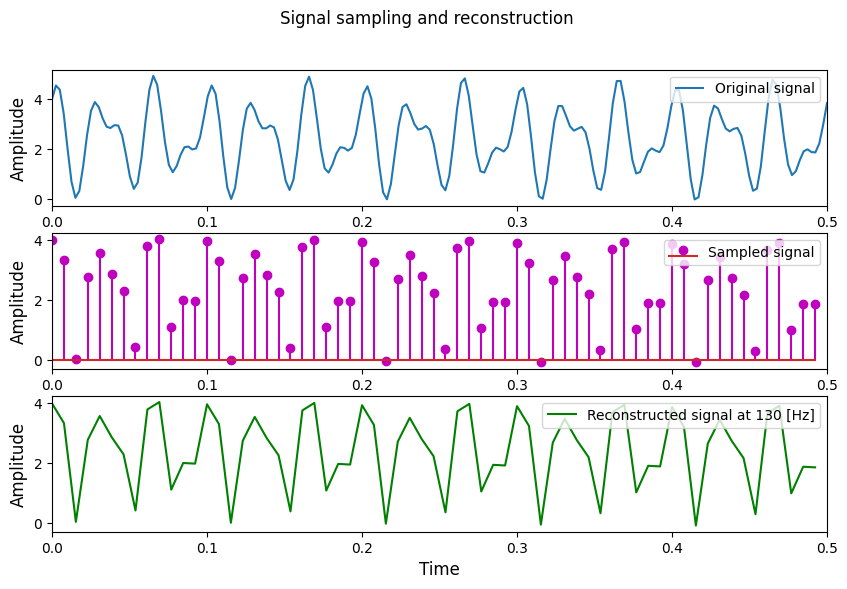

In [30]:
#Cuando la frecuencia de sampleo fs es mayor a 2*F_max

f_1 = 50 #Frecuencia mayor es de 50 [Hz]
f_2 = 30
time = np.linspace(0,0.5,200)

#Señal original
Signal = np.sin(2*np.pi*f_1*time)+1.5*np.cos(2*np.pi*f_2*time) + 2 * np.exp((-0.1 + 1j*0.2)*time) + 0.5 * np.exp((-0.2 + 1j*0.1)*time)

#Sampleo de señal
fs = 2*f_1+30
T = 1/fs

n = np.arange(0, 0.5/T)
nT = n * T

#Señal sampleada y reconstuida

Signal_sampled = np.sin(2*np.pi*f_1*nT)+1.5*np.cos(2*np.pi*f_2*nT) + 2 * np.exp((-0.1 + 1j*0.2)*nT) + 0.5 * np.exp((-0.2 + 1j*0.1)*nT)

#Graficando señal original, sampleada y reconstruida

plt.figure(figsize=(10,6))
plt.suptitle('Signal sampling and reconstruction')

plt.subplot(3,1,1)
plt.plot(time,Signal, label='Original signal')
plt.xlim(0,0.5)
plt.ylabel('Amplitude', fontsize=12)
plt.legend(fontsize=10, loc='upper right')

plt.subplot(3,1,2)
plt.stem(nT,Signal_sampled,'m', label='Sampled signal')
plt.xlim(0,0.5)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Amplitude', fontsize=12)
plt.legend(fontsize=10, loc='upper right')

plt.subplot(3,1,3)
plt.plot(nT,Signal_sampled,'g-', label='Reconstructed signal at 130 [Hz]')
plt.xlim(0,0.5)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Amplitude', fontsize=12)
plt.legend(fontsize=10, loc='upper right')

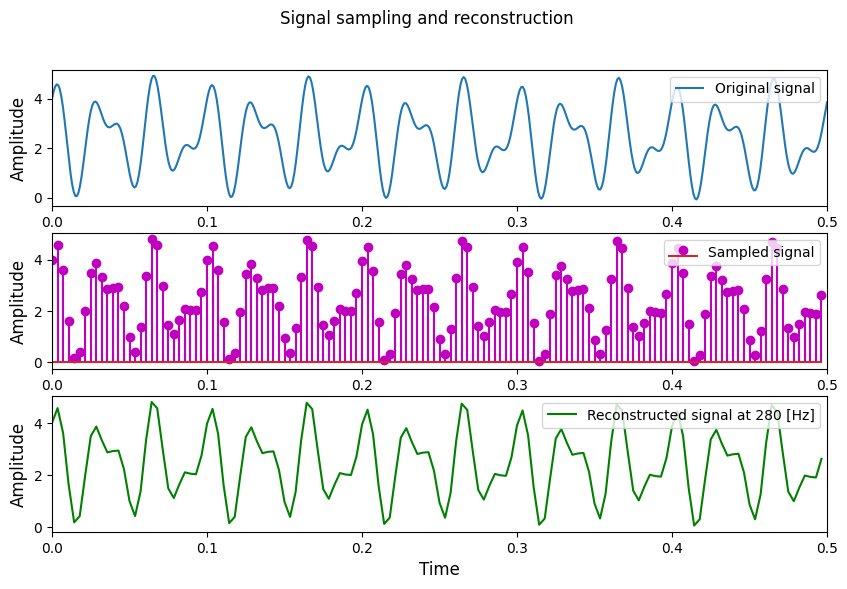

In [31]:
#Cuando la frecuencia de sampleo fs es mayor a 5*F_max

f_1 = 50 #Frecuencia mayor es de 50 [Hz]
f_2 = 30
time = np.linspace(0,0.5,500)

#Señal original
Signal = np.sin(2*np.pi*f_1*time)+1.5*np.cos(2*np.pi*f_2*time) + 2 * np.exp((-0.1 + 1j*0.2)*time) + 0.5 * np.exp((-0.2 + 1j*0.1)*time)

#Sampleo de señal
fs = 5*f_1+30
T = 1/fs

n = np.arange(0, 0.5/T)
nT = n * T

#Señal sampleada y reconstuida

Signal_sampled = np.sin(2*np.pi*f_1*nT)+1.5*np.cos(2*np.pi*f_2*nT) + 2 * np.exp((-0.1 + 1j*0.2)*nT) + 0.5 * np.exp((-0.2 + 1j*0.1)*nT)

#Graficando señal original, sampleada y reconstruida

plt.figure(figsize=(10,6))
plt.suptitle('Signal sampling and reconstruction')

plt.subplot(3,1,1)
plt.plot(time,Signal, label='Original signal')
plt.ylabel('Amplitude', fontsize=12)
plt.xlim(0,0.5)
plt.legend(fontsize=10, loc='upper right')

plt.subplot(3,1,2)
plt.stem(nT,Signal_sampled,'m', label='Sampled signal')
plt.xlim(0,0.5)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Amplitude', fontsize=12)
plt.legend(fontsize=10, loc='upper right')

plt.subplot(3,1,3)
plt.plot(nT,Signal_sampled,'g-', label='Reconstructed signal at 280 [Hz]')
plt.xlim(0,0.5)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Amplitude', fontsize=12)
plt.legend(fontsize=10, loc='upper right')

### 3.6 Explica tus hallazgos

Al reconstruir la señal con una frecuencia de muestreo mayor a la frecuencia máxima de la señal se observa que la señal es reconstruida de una manera muy pobre respecto de la original, es decir, la señal reconstruida no tiene nada similar a la original. Luego, al realizar la reconstrucción con una frecuencia de muestreo mayor a dos veces la frecuencia máxima de la señal a reconstruir ya se observa una similitud entre la señal original y la reconstruida, con la diferencia que esta última presenta las curvas demasiado pronunciadas (en punta) debido a la tasa de muestreo. Mientras que, al realizar el muestreo y la reconstrucción utilizando una frecuencia de muestreo de cinco veces la frecuencia máxima de la señal esta ya muestra bastante bien la reconstrucción de la señal, esto debido a que la cantidad de puntos utilizados para cuantificar la señal y reconstruirla es mucho mayor, por lo que mejora la exactitud de la reconstrucción.
Esto demuestra que el teorema de Nyquist se cumple debido a que, este señala que si una señal se muestrea a una tasa mayor al doble de su frecuencia esta se puede recuperar completamente a partir de sus muestras.

## 4. Referencias
<p align="justify">
    

[Sobre Teorema del sampleo]https://ipython-books.github.io/chapter-10-signal-processing/

[Sobre Matplotlib] https://matplotlib.org/stable/gallery/mplot3d/2dcollections3d.html#sphx-glr-gallery-mplot3d-2dcollections3d-py

[Signal Processing with Python] https://www.kaggle.com/code/faressayah/signal-processing-with-python#Signal-Reconstruction